# Section 3 - Supervised Learning

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore") # to ignore long warning messages

import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, BaggingRegressor, AdaBoostRegressor, StackingRegressor

from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from scipy.stats import pearsonr

from sklearn.feature_selection import SelectFromModel

from sklearn.utils import resample

from sklearn.model_selection import RandomizedSearchCV, cross_val_score

import joblib

import matplotlib.pyplot as plt
import seaborn as sns

## Load the data
First let's load the data from the .csv files created in section 1 and then verifying its contents. After that we will prepare the train and test set to the fitting and prediction tasks.

In [2]:
# Load the train dataset with pandas
train_dataset = pd.read_csv('data/ML_train_dataset.csv')

# Verifying the data by printing the shape (number of rows and columns), checking for NaNs, and observing the descriptive statistics of target column 'Y'
print(f"Train dataset shape: {train_dataset.shape[0]} rows x {train_dataset.shape[1]} columns.")            # Shape
print(f"Train dataset has NaNs?: {train_dataset.isnull().values.any()}")                                    # Check for NaNs
print(f"\nDescriptive Statistics of target column 'Y' for train dataset:\n{train_dataset['Y'].describe()}") # Descriptive statistics of 'Y' column

# Print the first 5 rows of the data
train_dataset.head()

Train dataset shape: 18442 rows x 10334 columns.
Train dataset has NaNs?: False

Descriptive Statistics of target column 'Y' for train dataset:
count    18442.000000
mean         5.117212
std         22.902877
min       -326.464304
25%         -5.581255
50%          4.337603
75%         15.099934
max        179.123325
Name: Y, dtype: float64


,Genomic_0,Genomic_1,Genomic_2,Genomic_3,Genomic_4,Genomic_5,Genomic_6,Genomic_7,Genomic_8,Genomic_9,...,Morgan_1004_drug2,Morgan_1005_drug2,Morgan_1009_drug2,Morgan_1010_drug2,Morgan_1011_drug2,Morgan_1014_drug2,Morgan_1017_drug2,Morgan_1018_drug2,Morgan_1019_drug2,Y
0,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.693530
1,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.778053
2,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.198505
3,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.139971
4,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.175936


In [3]:
# Load the test data with pandas
test_dataset = pd.read_csv('data/ML_test_dataset.csv')

# Verifying the data by printing the shape (number of rows and columns), checking for NaNs, and observing the descriptive statistics of target column 'Y'
print(f"Test dataset shape: {test_dataset.shape[0]} rows x {test_dataset.shape[1]} columns.")               # Shape
print(f"Test dataset has NaNs?: {test_dataset.isnull().values.any()}")                                      # Check for NaNs
print(f"\nDescriptive Statistics of target column 'Y' for test dataset:\n{test_dataset['Y'].describe()}")   # Descriptive statistics of 'Y' column

# Print the first 5 rows of the data
test_dataset.head()

Test dataset shape: 4610 rows x 10334 columns.
Test dataset has NaNs?: False

Descriptive Statistics of target column 'Y' for test dataset:
count    4610.000000
mean        5.242951
std        22.847305
min      -242.808727
25%        -5.386006
50%         4.459068
75%        15.004705
max       169.716658
Name: Y, dtype: float64


,Genomic_0,Genomic_1,Genomic_2,Genomic_3,Genomic_4,Genomic_5,Genomic_6,Genomic_7,Genomic_8,Genomic_9,...,Morgan_1004_drug2,Morgan_1005_drug2,Morgan_1009_drug2,Morgan_1010_drug2,Morgan_1011_drug2,Morgan_1014_drug2,Morgan_1017_drug2,Morgan_1018_drug2,Morgan_1019_drug2,Y
0,-0.189761,-0.198631,-0.189761,-0.960891,-0.398382,-0.189761,-0.189761,-1.395685,-0.674233,-0.890960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-66.134218
1,-0.189761,-0.198631,-0.189761,1.492552,-0.398382,-0.189761,-0.189761,-0.928305,-0.674233,-0.890960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.809199
2,-0.189761,-0.198631,-0.189761,0.905970,-0.398382,-0.189761,-0.189761,0.784357,-0.674233,1.650004,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.652960
3,-0.189761,-0.198631,-0.189761,0.905970,-0.398382,-0.189761,-0.189761,-1.021070,-0.674233,0.572001,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-16.204517
4,-0.189761,-0.198631,-0.189761,0.905970,-0.398382,-0.189761,-0.189761,-1.021070,-0.674233,0.572001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-17.080158


In [4]:
# Defining a random_state seed for reproducible results.
seed = 42

# Splitting X and Y on the train and test datasets
# For train dataset
X_train = train_dataset.drop('Y', axis=1)  # Features
y_train = train_dataset['Y']               # Target

# For test dataset
X_test = test_dataset.drop('Y', axis=1)    # Features
y_test = test_dataset['Y']                 # Target

# Checking the shape of the resulting sets
print(f'Training Set \t Shape of X_train: {X_train.shape} \n\t\t Shape of y_train: {y_train.shape} \n')
print(f'Test Set \t Shape of X_test: {X_test.shape} \n\t\t Shape of y_test: {y_test.shape}')

Training Set 	 Shape of X_train: (18442, 10333) 
		 Shape of y_train: (18442,) 

Test Set 	 Shape of X_test: (4610, 10333) 
		 Shape of y_test: (4610,)


## Train and test Ridge Regression model

First, we will train and test the Ridge Regression model. For the evaluation of this model and later models, we will use the following metrics:

- Mean Squared Error (``MSE``): Measures the average squared difference between predicted and actual values. Larger errors have a greater impact, highlighting how far predictions deviate from actual values.
- Root Mean Squared Error (``RMSE``): The square root of MSE, indicating the average prediction error in the same units as the target variable ``Y``, making it easier to interpret.
- R² (``R2`` or R squared): Represents the proportion of the target variable's variance explained by the model. A higher R² indicates the model captures more of the data's variability.
- Pearson Correlation Coefficient (``Pearson_r``): Indicates the strength and direction of the linear relationship between predicted and actual values. Values close to 1 or -1 show strong correlations, while values near 0 show weak or no linear correlation.

In [5]:
# Ridge Regression
ridge = Ridge(random_state=seed, max_iter=1000)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

# Printing the Test set results
print('MSE on Test set:', mean_squared_error(y_test, y_pred))
print('RMSE on Test set:', root_mean_squared_error(y_test, y_pred))
print("R2 on Test set:", r2_score(y_test, y_pred))
print('Pearson_r on Test set:', pearsonr(y_test, y_pred))

MSE on Test set: 404.76470121443384
RMSE on Test set: 20.118764902807374
R2 on Test set: 0.2244194554691883
Pearson_r on Test set: PearsonRResult(statistic=0.473855130303444, pvalue=8.724626978962243e-257)


## Feature selection from model

In [6]:
# Feature Selection from Model

# Feature Selection from Ridge using SelectFromModel
selector = SelectFromModel(estimator=ridge)
selector.fit(X_train, y_train)

# Get the boolean mask of selected features
selected_features_mask = selector.get_support()

# Get the column names of selected features
selected_columns = X_train.columns[selected_features_mask]

# Transform the data
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

print(f'Transformed Train set shape: {X_train.shape}')
print(f'Transformed Test set shape: {X_test.shape}')
print(f'Selected columns:\n{selected_columns}')

Transformed Train set shape: (18442, 2205)
Transformed Test set shape: (4610, 2205)
Selected columns:
Index(['Genomic_12', 'Genomic_24', 'Genomic_39', 'Genomic_119', 'Genomic_145',
       'Genomic_162', 'Genomic_163', 'Genomic_164', 'Genomic_165',
       'Genomic_166',
       ...
       'PEOE_VSA9_drug2', 'SMR_VSA10_drug2', 'SlogP_VSA1_drug2',
       'SlogP_VSA4_drug2', 'SlogP_VSA8_drug2', 'EState_VSA5_drug2',
       'EState_VSA7_drug2', 'MolLogP_drug2', 'fr_HOCCN_drug2',
       'fr_para_hydroxylation_drug2'],
      dtype='object', length=2205)


## Train and test multiple models

In [ ]:
# Train and Test multiple Models
models = [Lasso(random_state=seed, max_iter=1000),
          Ridge(random_state=seed, max_iter=1000),
          RandomForestRegressor(random_state=seed, n_jobs=-1),  # n_jobs=-1 ensures all CPU cores are used. Model performance is not affected.
          SVR(),
          KNeighborsRegressor()]

# Initialize metrics list of each model (will be used to create a pandas.DataFrame!)
metrics_summary = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = root_mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    test_pearsonr = pearsonr(y_test, y_pred)

    # Print metrics results for each model (Helps immediately check results and see which model is being trained and tested)
    print(f"Model: {model.__class__.__name__}")
    print('MSE on Test set:', test_mse)
    print('RMSE on Test set:', test_rmse)
    print("R2 on Test set:", test_r2)
    print('Pearson_r on Test set:', test_pearsonr)
    print('-' * 30)

    # Store metrics and model name
    metrics_summary.append({
        'Model': model.__class__.__name__,
        'RMSE': test_rmse,
        'MSE': test_mse,
        'R2': test_r2,
        'Pearson_r': test_pearsonr
    })

metrics_df = pd.DataFrame(metrics_summary)
metrics_df

Model: Lasso
MSE on Test set: 427.08885870929134
RMSE on Test set: 20.666128295094158
R2 on Test set: 0.1816435360915729
Pearson_r on Test set: PearsonRResult(statistic=0.4426170213706921, pvalue=1.7615704072378128e-220)
------------------------------
Model: Ridge
MSE on Test set: 404.9150196974977
RMSE on Test set: 20.122500334140828
R2 on Test set: 0.22413142617563098
Pearson_r on Test set: PearsonRResult(statistic=0.4735533814925631, pvalue=2.0409799035810805e-256)
------------------------------
Model: RandomForestRegressor
MSE on Test set: 272.6942907042847
RMSE on Test set: 16.513457866367197
R2 on Test set: 0.47748312577576446
Pearson_r on Test set: PearsonRResult(statistic=0.6915885326057355, pvalue=0.0)
------------------------------
Model: SVR
MSE on Test set: 415.72723722995863
RMSE on Test set: 20.38939031040307
R2 on Test set: 0.20341384498277626
Pearson_r on Test set: PearsonRResult(statistic=0.48409118130653617, pvalue=1.5783117551861148e-269)
----------------------------

,Model,RMSE,MSE,R2,Pearson_r
0,Lasso,20.666128,427.088859,0.181644,"(0.4426170213706921, 1.7615704072378128e-220)"
1,Ridge,20.122500,404.915020,0.224131,"(0.4735533814925631, 2.0409799035810805e-256)"
2,RandomForestRegressor,16.513458,272.694291,0.477483,"(0.6915885326057355, 0.0)"
3,SVR,20.389390,415.727237,0.203414,"(0.48409118130653617, 1.5783117551861148e-269)"
4,KNeighborsRegressor,19.914101,396.571436,0.240119,"(0.516175845281297, 2.109735850854e-312)"


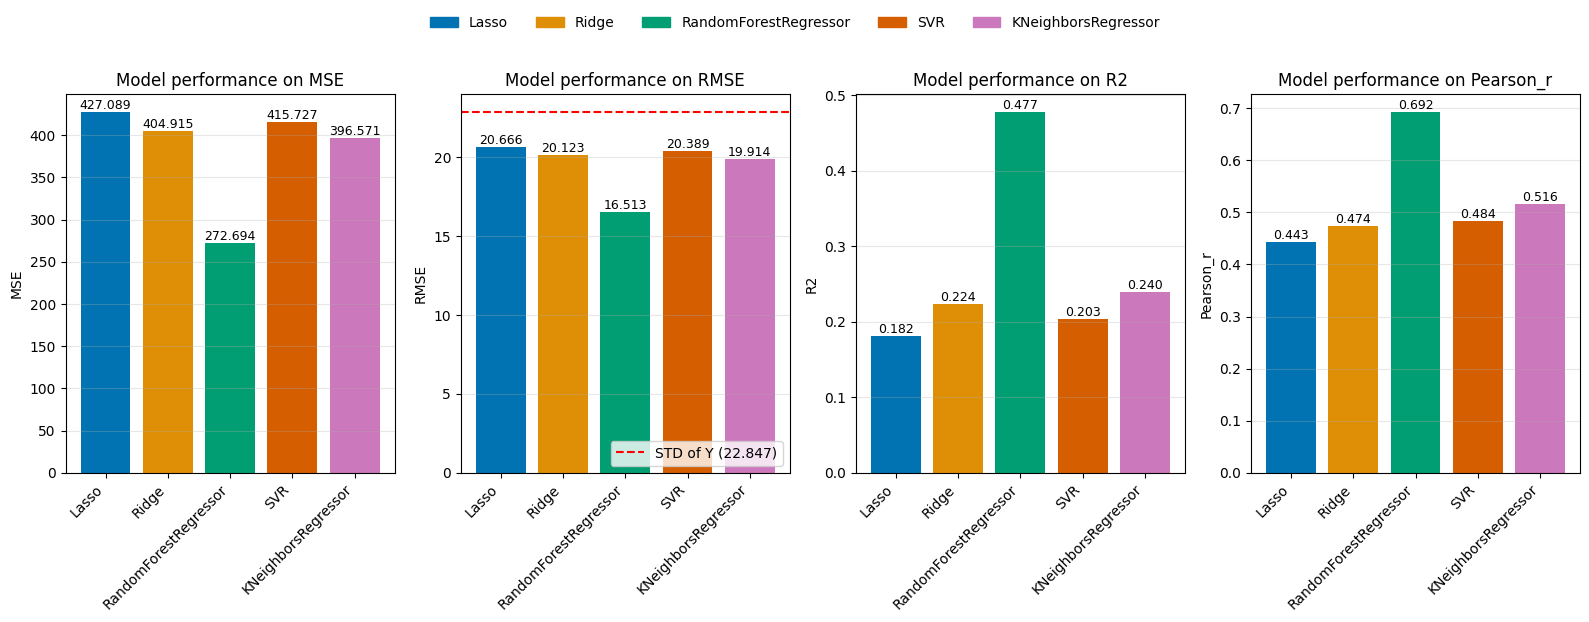

In [ ]:
# Barplot to demonstrate each model's performance

# Defining a colorblind-friendly palette for each Model
model_colors = dict(zip(metrics_df['Model'], sns.color_palette('colorblind', len(metrics_df['Model']))))

metrics_to_plot = ['MSE', 'RMSE', 'R2', 'Pearson_r']
std_y = round(test_dataset['Y'].std(), 4)  # Using the standard deviation of the test dataset's 'Y' column

plt.figure(figsize=(16, 6))

# Create subplots for each metric
for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(1, len(metrics_to_plot), i)
    
    # Plot each model's bar with its corresponding color
    for model, color in model_colors.items():
        # Extract the value for each metric from the dataframe
        value = metrics_df.loc[metrics_df['Model'] == model, metric].values[0]

        # If the metric is Pearson_r, extract the 'statistic' value in the tuple, which is its first element
        if metric == 'Pearson_r':
            value = metrics_df.loc[metrics_df['Model'] == model, 'Pearson_r'].values[0][0]
            value = round(value, 3)  # Format Pearson correlation to 3 decimal places
            
        plt.bar(model, value, color=color)
        plt.text(model, value, f"{value:.3f}", ha='center', va='bottom', fontsize=9)

    plt.grid(axis='y', alpha=0.3)

    # Add a red line for RMSE plot to compare with standard deviation. RMSE values lower than the STD of 'Y' indicates satisfactory model performance
    if metric == 'RMSE':
        plt.axhline(y=std_y, color='red', linestyle='--', label=f'STD of Y ({std_y:.3f})')
        plt.legend(loc='lower right')

    plt.title(f'Model performance on {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')

# Add an overarching legend for the models
handles = [plt.Rectangle((0, 0), 1, 1, color=model_colors[model]) for model in model_colors]
plt.figlegend(handles, model_colors.keys(), loc='upper center', ncol=len(model_colors), frameon=False, bbox_to_anchor=(0.5, 1.04))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

After training and testing multiple regression models, the Random Forest Regressor emerged as the best performer across all evaluation metrics:

- MSE: Random Forest achieved the lowest MSE of 272.69, indicating it was the most effective at minimizing large prediction errors.
- RMSE: With an RMSE of 16.51, Random Forest demonstrated the smallest average prediction error, meaning its predictions were closer to the actual target values than any other model.
- R2: Random Forest had an R2 score of 0.477, meaning it explained approximately 47.7% of the variance in the target variable. This was significantly higher than the other models, which struggled to explain the variability in the data as effectively.
- Pearson_r: The Random Forest model achieved a Pearson correlation of 0.692, reflecting a strong positive linear relationship between the predicted and actual values. This indicates that the Random Forest model consistently produced predictions that were highly aligned with the true outcomes.

For this reason, we can later optimize RandomForestRegressor for the dataset using Hyperparameter Tuning.

In [13]:
# Determine the best model based on R2 or Pearson_r (higher is better)
best_model_r2 = max(metrics_summary, key=lambda x: x['R2'])
best_model_pearson_r = max(metrics_summary, key=lambda x: x['Pearson_r'])

# Determine the best model based on MSE or RMSE (lower is better)
best_model_mse = min(metrics_summary, key=lambda x: x['MSE'])
best_model_rmse = min(metrics_summary, key=lambda x: x['RMSE'])

# Print the best models
print(f"Model with best MSE: {best_model_mse['Model']}\nMSE: {best_model_mse['MSE']}\n")
print(f"Model with best RMSE: {best_model_rmse['Model']}\nRMSE: {best_model_rmse['RMSE']}\n")
print(f"Model with best R2: {best_model_r2['Model']}\nR2: {best_model_r2['R2']}\n")
print(f"Model with best Pearson_r: {best_model_pearson_r['Model']}\nPearson_r: {best_model_pearson_r['Pearson_r']}")

Model with best MSE: RandomForestRegressor
MSE: 272.6942907042847

Model with best RMSE: RandomForestRegressor
RMSE: 16.513457866367197

Model with best R2: RandomForestRegressor
R2: 0.47748312577576446

Model with best Pearson_r: RandomForestRegressor
Pearson_r: PearsonRResult(statistic=0.6915885326057355, pvalue=0.0)


## Ensemble Methods
### Voting technique
Selecting the previously used models to performed an Ensemble method via ``VotingRegressor``. This method combines the predictions of multiple base regression models to improve overall performance and robustness, leveraging the strengths of individual models to produce a final prediction that is more accurate than any single model.

In [ ]:
# Ensemble methods
# Create a list of tuples containing our models to be used as input (will be applied again in the Stacking Method)
estimators=[('lasso', Lasso(random_state=seed, max_iter=1000)), 
            ('ridge', Ridge(random_state=seed, max_iter=1000)), 
            ('rf', RandomForestRegressor(random_state=seed, n_jobs=-1)), 
            ('svr', SVR()), 
            ('knn', KNeighborsRegressor())]

# Create our Voting Regressor, inputting our models
ensemble = VotingRegressor(estimators)

# Fit model to training data
ensemble.fit(X_train, y_train)

# Test our model on the test data
ensemble.score(X_test, y_test)
y_pred = ensemble.predict(X_test)

# Store results in a dictionary for ensemble
ensemble_dict = {
    "Model": "Voting Regressor",
    "MSE": mean_squared_error(y_test, y_pred),
    "RMSE": root_mean_squared_error(y_test, y_pred),
    "R2": r2_score(y_test, y_pred),
    "Pearson_r": pearsonr(y_test, y_pred)[0]
}

print('MSE on Test set:', mean_squared_error(y_test, y_pred))
print('RMSE on Test set:', root_mean_squared_error(y_test, y_pred))
print('R2 on Test set:', r2_score(y_test, y_pred))
print('Pearson_r on Test set:', pearsonr(y_test, y_pred))

MSE on Test set: 340.31490656003183
RMSE on Test set: 18.44762604131035
R2 on Test set: 0.3479134426745568
Pearson_r on Test set: PearsonRResult(statistic=0.620074575606403, pvalue=0.0)


### Bagging technique
Ensemble technique designed to improve model stability and accuracy while reducing variance and overfitting. It achieves this by combining predictions from multiple base models (usually the same type) trained on different subsets of the data.

We will use ``RandomForestRegressor`` as the estimator to be used for the Bagging method.

In [15]:
# Bagging
bagging = BaggingRegressor(
    estimator=RandomForestRegressor(random_state=seed, n_jobs=-1), 
    n_estimators=10, 
    random_state=seed)

# Fit model to training data
bagging.fit(X_train, y_train)

# Test our model on the test data
y_pred = bagging.predict(X_test)

# Store results in a dictionary for bagging
bagging_dict = {
    "Model": f"Bagging ({bagging.estimator.__class__.__name__})",
    "MSE": mean_squared_error(y_test, y_pred),
    "RMSE": root_mean_squared_error(y_test, y_pred),
    "R2": r2_score(y_test, y_pred),
    "Pearson_r": pearsonr(y_test, y_pred)[0]
}

print(f'Bagging method using estimator: {bagging.estimator.__class__.__name__}')
print('MSE on test set:', mean_squared_error(y_test, y_pred))
print('RMSE on test set:', root_mean_squared_error(y_test, y_pred))
print('R2 on test set:', r2_score(y_test, y_pred))
print('Pearson_r on test set:', pearsonr(y_test, y_pred))

Bagging method using estimator: RandomForestRegressor
MSE on test set: 277.27196582046093
RMSE on test set: 16.6514853938158
R2 on test set: 0.46871171920637533
Pearson_r on test set: PearsonRResult(statistic=0.6895459432468505, pvalue=0.0)


### Boosting technique
Boosting is an ensemble learning technique that combines the predictions of several weak learners to create a strong learner with improved accuracy. Boosting is especially useful when individual models struggle to make accurate predictions by themselves.

For this task, we will use the ``AdaBoostRegressor`` algorithm.

In [16]:
# Boosting
adaboost = AdaBoostRegressor(n_estimators=100, random_state=seed)

# Fit model to training data
adaboost.fit(X_train, y_train)

# Test our model on the test data
y_pred = adaboost.predict(X_test)

# Store results in a dictionary for boosting
boosting_dict = {
    "Model": "AdaBoost Regressor",
    "MSE": mean_squared_error(y_test, y_pred),
    "RMSE": root_mean_squared_error(y_test, y_pred),
    "R2": r2_score(y_test, y_pred),
    "Pearson_r": pearsonr(y_test, y_pred)[0]
}

print('MSE on Test set:', mean_squared_error(y_test, y_pred))
print('RMSE on Test set:', root_mean_squared_error(y_test, y_pred))
print("R2 on Test set:", r2_score(y_test, y_pred))
print('Pearson_r on Test set:', pearsonr(y_test, y_pred))

MSE on Test set: 537.2993080707183
RMSE on Test set: 23.179717601185704
R2 on Test set: -0.02953367395727824
Pearson_r on Test set: PearsonRResult(statistic=0.31934915005627573, pvalue=8.544975798083181e-110)


### Stacking technique

Combines multiple models (base estimators) to create a more robust and accurate predictive model. Unlike other ensemble techniques like bagging or boosting, stacking uses a meta-model (also called the final estimator) to learn how to optimally combine the predictions of the base models.

We will utilize the previously defined ``estimators`` list of tuples that includes all the models used in the earlier "Train and testing multiple models" section to act as the base estimators and the Ridge Regression model as the final estimator.

In [17]:
# Stacking Regressor using the models selected in the 'estimators' list (created in the Ensemble section) with Ridge as the final estimator
stacking = StackingRegressor(estimators=estimators, 
                             final_estimator=Ridge(random_state=seed, max_iter=1000))

# Fit model to training data
stacking.fit(X_train, y_train)

# Test our model on the test data
y_pred = stacking.predict(X_test)

# Store results in a dictionary for stacking
stacking_dict = {
    "Model": "Stacking Regressor",
    "MSE": mean_squared_error(y_test, y_pred),
    "RMSE": root_mean_squared_error(y_test, y_pred),
    "R2": r2_score(y_test, y_pred),
    "Pearson_r": pearsonr(y_test, y_pred)[0]
}

print('MSE on Test set:', mean_squared_error(y_test, y_pred))
print('RMSE on Test set:', root_mean_squared_error(y_test, y_pred))
print('R2 on Test set:', r2_score(y_test, y_pred))
print('Pearson_r on Test set:', pearsonr(y_test, y_pred))

MSE on Test set: 306.68468657037914
RMSE on Test set: 17.51241521236803
R2 on Test set: 0.41235321287686943
Pearson_r on Test set: PearsonRResult(statistic=0.6537120136467683, pvalue=0.0)


### Voting, Bagging, Boosting, Stacking techniques comparisons

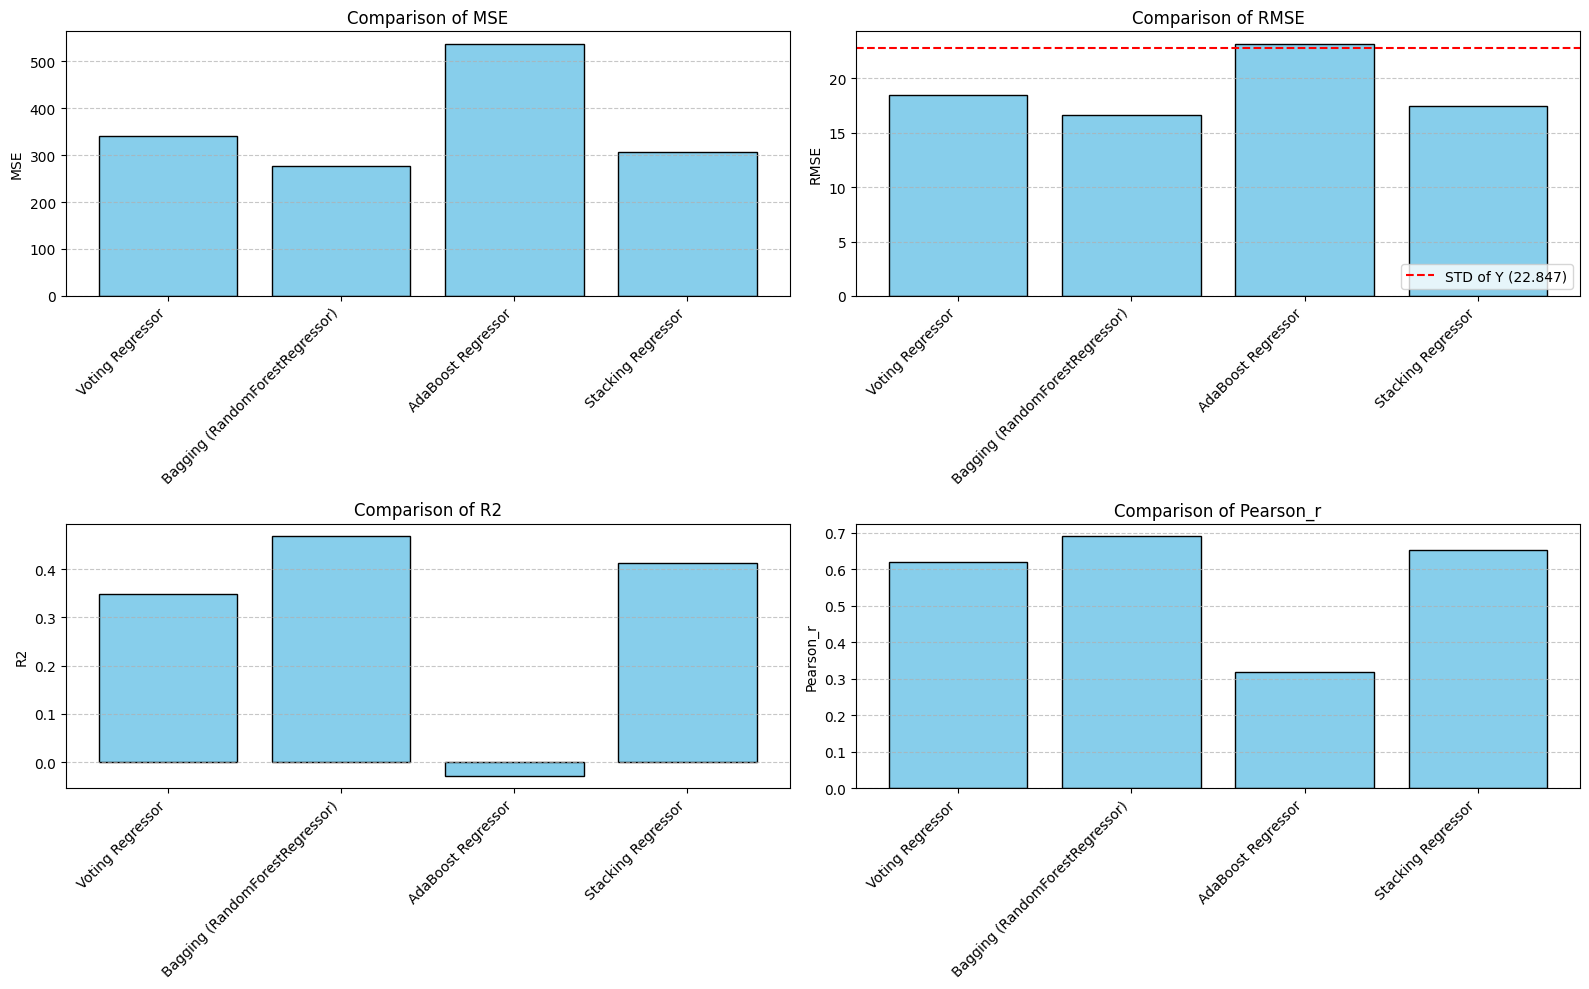

In [28]:
# Combine all results into a list
all_results = [ensemble_dict, bagging_dict, boosting_dict, stacking_dict]

# Extract data for plotting
models = [result["Model"] for result in all_results]
mse = [result["MSE"] for result in all_results]
rmse = [result["RMSE"] for result in all_results]
r2 = [result["R2"] for result in all_results]

# Handle Pearson_r extraction dynamically
pearson_r = [
    result["Pearson_r"][0] if isinstance(result["Pearson_r"], tuple) else result["Pearson_r"]
    for result in all_results
]

# Create bar plots
metrics = {"MSE": mse, "RMSE": rmse, "R2": r2, "Pearson_r": pearson_r}

plt.figure(figsize=(16, 10))
for i, (metric_name, values) in enumerate(metrics.items(), 1):
    plt.subplot(2, 2, i)
    plt.bar(models, values, color="skyblue", edgecolor="black")

    # Add the threshold line for RMSE ('std_y', which was calculated earlier)
    if metric_name == "RMSE":
        plt.axhline(y=std_y, color="red", linestyle="--", label=f"STD of Y ({std_y:.3f})")
        plt.legend(loc="lower right")

    # Add plot details
    plt.title(f"Comparison of {metric_name}")
    plt.ylabel(metric_name)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

### Evaluation of the Ensemble techniques

**Boosting’s Poor Performance:**
The ``AdaBoostRegressor`` performed poorly, with a negative R2 (-0.030). This means it performs worse than a naive baseline (predicting the mean target value). The likely reasons include:
- Weak learners that are insufficiently complex to handle the underlying data patterns.
- Its low Pearson_r of 0.319 indicates a weak positive linear correlation between predictions and actual values.

**Moderate Performance of Stacking:**
The Stacking Regressor demonstrates good performance but falls short of Bagging. While the Ridge meta-model combines predictions effectively, the final accuracy suggests that combining these specific base models (Lasso, Ridge, RandomForest, SVR, KNN) might not be optimal.

**Voting Regressor’s Balanced Performance:**
The Voting Regressor performs moderately, achieving better results than Boosting but lagging behind Bagging and Stacking. This is expected, as it relies on averaging predictions, which might dilute the contribution of high-performing models.

**Best-Performing Ensemble technique:**
The Bagging Regressor (using ``RandomForestRegressor`` as the base estimator) is the best-performing model, achieving the lowest RMSE (16.65) and the highest R2 (0.469), ontop of that, the relationship between the actual and forecasted values showed a very strong positive relationship, with a Pearson correlation coefficient of 0.6895. This indicates that Bagging is most effective in capturing patterns while maintaining generalization. These results are similar to the values obtained in the literature of the data, where the reported MSE by Random Forests is 307.56, while the Pearson correlation is 0.65.

## Model validation

We will use cross-validation to validate the best model (random forest)

In [29]:
# Initialize and fit a Random Forest Regression
rf = RandomForestRegressor(random_state=seed, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [30]:
# Model Validation

# Cross-Validation
scores = cross_val_score(rf, X_train, y_train, cv=5)
print('Cross Validation Scores:', scores)
print('Mean Cross Validation Score:', scores.mean())

Cross Validation Scores: [0.17990587 0.12847353 0.253433   0.1911703  0.12898075]
Mean Cross Validation Score: 0.17639268856817422


## Hyperparameter tuning

We will use random search to find the best hyperparameters for a selected model, which in this case will be the ``RandomForestRegressor`` model.

In [38]:
# Hyperparameter tuning using RandomizedSearchCV
param_grid = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [None, 5, 10, 20],
    'max_features': [None, 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=seed)
rand_search = RandomizedSearchCV(rf, param_grid, cv=3, verbose=2, n_jobs=-1, n_iter=5) # If MemoryError, try cv=3 or n_iter=3
rand_search.fit(X_train, y_train)

# Best hyperparameters from RandomizedSearchCV
best_params = rand_search.best_params_
best_model = rand_search.best_estimator_

# Fit the best model to the training data
best_model.fit(X_train, y_train)
y_pred_rf = best_model.predict(X_test)

# Obtain metrics for the best model
tuned_mse = mean_squared_error(y_test, y_pred_rf)
tuned_rmse = root_mean_squared_error(y_test, y_pred_rf)
tuned_pearson_r, _ = pearsonr(y_test, y_pred_rf)
tuned_r2 = r2_score(y_test, y_pred_rf)

# Store metrics in a dictionary if necessary for later use
tuned_metrics_dict = {
    'Model': 'Random Forest (Tuned)',
    'MSE': tuned_mse,
    'RMSE': tuned_rmse,
    'R2': tuned_r2,
    'Pearson_r': tuned_pearson_r
}

# Print the best parameters and metrics
print('Best Parameters:', best_params)
print(f'MSE: {tuned_mse}')
print(f'RMSE: {tuned_rmse}')
print(f'R2 Score: {tuned_r2}')
print(f'Pearson_r: {tuned_pearson_r}')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}
MSE: 276.7662314715975
RMSE: 16.636292599963415
R2 Score: 0.469680770411934
Pearson_r: 0.6880889063191139


## Save and load the best model

In [39]:
# Save the best model
joblib.dump(rand_search.best_estimator_, 'data/best_model_rf.pkl')

# Load the best model
best_model = joblib.load('data/best_model_rf.pkl')
best_model.score(X_test, y_test)

0.469680770411934

## Model interpretation

*scikit-learn* provides multiple methods for model interpretation. Here we will see feature importance and permutation importance.

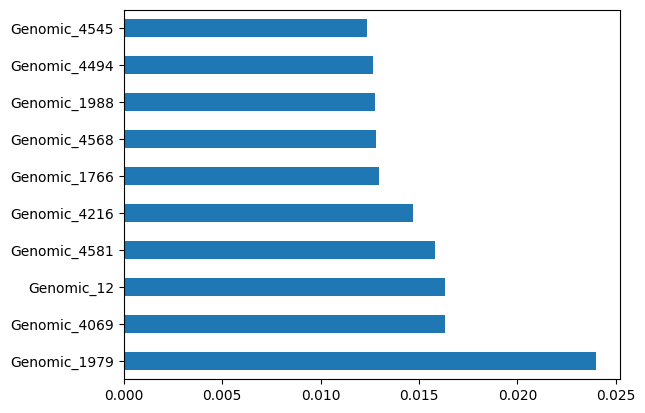

In [40]:
# Model Interpretation

# Feature Importance
rf = RandomForestRegressor(random_state=42, n_estimators=10, max_depth=None, max_features='sqrt', min_samples_split=10, min_samples_leaf=4)
rf.fit(X_train, y_train)
rf.feature_importances_

# Plot feature Importance
importances = pd.Series(rf.feature_importances_, index=selected_columns)
importances.nlargest(10).plot(kind='barh')
plt.show()

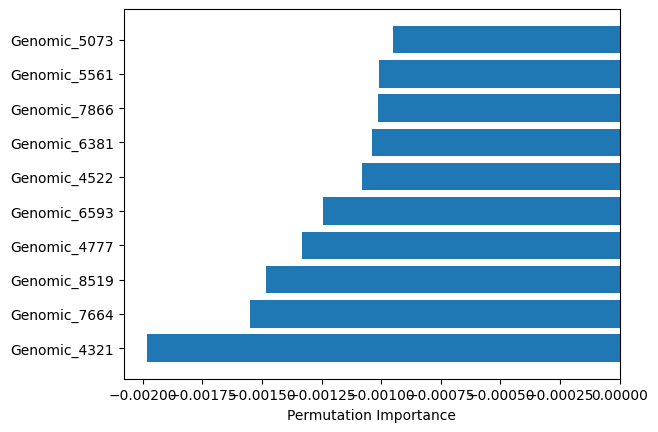

In [41]:
# Feature Importance based on Permutation Importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(selected_columns[sorted_idx[:10]], perm_importance.importances_mean[sorted_idx[:10]])
plt.xlabel("Permutation Importance")
plt.show()

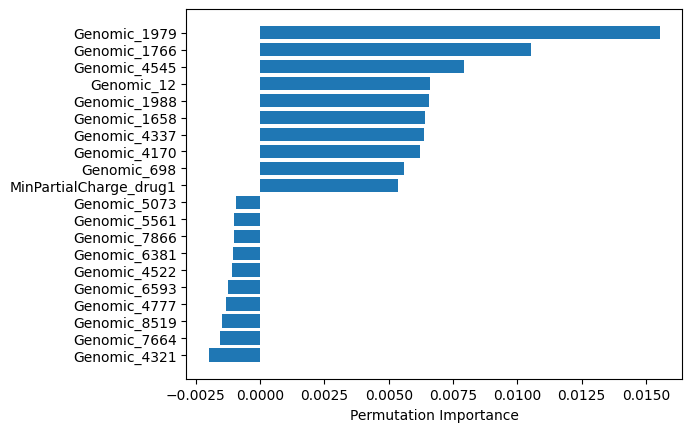

In [42]:
pos_neg_idx = np.concatenate((sorted_idx[:10], sorted_idx[-10:]))

plt.barh(selected_columns[pos_neg_idx], perm_importance.importances_mean[pos_neg_idx])
plt.xlabel("Permutation Importance")
plt.show()

The most influential variables in the model's predictions were identified, hence giving an insight into the key drivers of the target's behavior. Among these, the genomic features like ``Genomic_0``, ``Genomic_1``, etc., and Morgan fingerprints for drug-related attributes, such as ``Morgan_1004_drug2``, ``Morgan_1005_drug2``, were found to be very important contributors, hence explaining the variability of the target variable ``Y``. This clearly came out from the graphs, in the top variables within the model concentration that presented a point where the predictive power is maximized.


In contrast, variables with little or no importance should be treated with caution. For instance, if some genomic features or Morgan fingerprint variables have little or no effect on model predictions repeatedly; then their inclusion is merely to introduce noise or add to the model's complexity. The removal of such less influential features would streamline the model and could further help in interpretability and computational efficiency.


This indeed indicates that the genomic and drug-related data have interactions that affect the target variable in a complex way. The evidence provides insight not only into which features are most relevant but also underlines the potential for further refinement of the dataset, hence narrowing it toward a more efficient model capable of handling such complexities in genomic and drug-related predictions, therefore making better actionable outcomes for the domain.